# I. What drives the homogenization/heterogenization of music?

In the previous notebook (check_horkheimer), I found that while Horkheimer was right in that different and successful songs had many imitators, there was not strong evidence that genres became more specific as time went on. 

Instead of Horkheimer's theory of homogenization, I propose that there is a constant cycle of homogenization and heterogenization of music as a result of the constant tension between the dominant culture and subcultures. My general framework for understanding this tension comes from Hebdige's *Subculture: The Meaning of Style*. What specific trends catch on depends on the circuit of production, similar to the design of the Sony Walkman as outlined by DuGay et. al. in Chapter 2 of *Doing Cultural Studies*. The pattern of how trends spread follows the pattern of complex contagions, as described by Guilbeault et al in "Complex Contagions: A Decade in Review". Throughout this explanation, I compare how it differs from Horkheimer.

<!-- Hebdige -->
In *Subcultures: The Meaning of Style*, Hebdige criticizes how structural Marxism explains the reproduction of structures, but has no explanation for change. Hebdige defines style in subculture as gestures that challenge the cohesion of dominant culture. He uses the punk aesthetic as an example of a subculture that represented the white working class British youth as a response to the social unease in the post-war period. Out of objects such as safety pins, which were used to hold clothes together, it created "tokens of a self-imposed exile" (Hebdige 2). However, the image of social cohesion is maintained through the appropriation and redefinition of cultures of resistance. Thus, punk style was commodified and labelled as both trivial and a spectacle: "Youth cultural styles may begin by issuing symbolic challenges, but they must inevitably end by establishing new sets of conventions" (Hebidge 96).

Thus, my theory agrees with Horkehimer that "anyone who resists can survive only by being incorporated" (Horkheimer 104) through the commodification of subcultures. However, since there is a constant tension between hegemony and subcultures, I disagree that the wheel spins in place. Rather, the wheel travels through subcultures. The process of commodification defuses the subculture's subversive power, and its innovations are fed back to mainstream culture (Hebidge 95). Thus, as subcultures become part of the mainstream culture, they are influenced by the next subculture, so genres do not converge to a formula.

<!-- duGay -->
Additionally, while Horkheimer believes that culture is produced from the top-down, I argue that it is created and inspired through a bottom-up process. Using the circuit of production to analyze Hebdige reveals this relationship clearly. Before commodification, subcultures originate with oppressed groups, such as the white working class or Black American youth. Signifiers such as safety pins or AAVE are backed-up by the identity of these oppressed groups. Safety pins serve a functional purpose for the working class community, and AAVE comes from the linguistic history of Black Americans. Similar to how the design of the Walkman was limited by the budget of the target audience (DuGay 48), the objects that become sign-vehicles are influenced by the environment of the oppressed group. In the process of commodification, producers interpret the subculture as "cool", which targets their consumers. Through this exchange, the interpretant of oppressed community is changed to "coolness", which results in the ideology of the subculture becoming disconnected from the sign-vehicles. Thus, people who don't come from the working class or historically Black communities adopt signs such as safety pins or AAVE to legitimize their identity as "cool".

<!-- Guilbeault -->
The process of a subculture to catch on follows the model of a complex contagion, as described by Guilbeault et al in "Complex Contagions: A Decade in Review". A simple contagion only requires a single activated source for transmission, while complex contagions require multiple sources of activation, such as behaviors, beliefs, or attitudes (Guilbeault 4). Since subcultures are a behavior, they should act like a complex contagion, meaning they grow slowly at first, and then explode.

In [1]:
import importlib
import music
importlib.reload(music)

import access
# from access import *
importlib.reload(access)

c:\Users\grace\anaconda3\envs\macs40400\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<module 'access' from 'c:\\Users\\grace\\Desktop\\macs_404_patterns\\music_trends\\access.py'>

In [2]:
import youtube_dl
# import spotipy
# from spotipy.oauth2 import SpotifyClientCredentials
# import lyricsgenius
# import requests
# from rauth import OAuth2Service

import re
import json
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# II. Get data

### From spotify

In [132]:
client_credentials_manager = SpotifyClientCredentials(client_id = access.spotify_client_id, client_secret = access.spotify_client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

r = requests.post('https://accounts.spotify.com/api/token',
data ={'grant_type': 'client_credentials'},auth=(access.spotify_client_id, access.spotify_client_secret))
bearer = dict(r.json())['access_token']

In [133]:
categories_df = pd.DataFrame(sp.categories(limit=50)['categories']['items'])
np.array(categories_df['name'])

array(['Top Lists', 'Hip-Hop', 'Pop', 'Country', 'Latin', 'Rock',
       'Summer', 'Workout', 'R&B', 'Dance/Electronic', 'Netflix', 'Indie',
       'Mood', 'Sleep', 'Christian & Gospel', 'Regional Mexican',
       'Wellness', 'Chill', 'EQUAL', 'Gaming', 'Frequency', 'Pride',
       'Kids & Family', 'Party', 'Decades', 'Fresh Finds', 'Jazz',
       'Focus', 'Romance', 'Folk & Acoustic', 'K-Pop', 'Instrumental',
       'Sports', 'Ambient', 'Alternative', 'In the car', 'theLINER',
       'Classical', 'Soul', 'Spotify Singles', 'Cooking & Dining', 'Punk',
       'Pop culture', 'Blues', 'Desi', 'Arab', 'RADAR', 'Student',
       'Anime', 'Tastemakers'], dtype=object)

In [4]:
# r = requests.get('https://api.spotify.com/v1/recommendations/available-genre-seeds', headers={'Authorization': 'Bearer ' + bearer})
# all_genres = set(r.json()['genres'])
hottopic_genres = ['rock','garage','hip-hop','k-pop','metal','punk','emo','anime']

In [5]:
genre_dict = {}
for genre in hottopic_genres:
    # genre_dict[genre] = pd.DataFrame()
    # for year in range(1960,2022):
    #     year_df = music.spotify_query(genre,year)
    #     print(genre, year)
    #     genre_dict[genre] = pd.concat([genre_dict[genre],year_df])
    # genre_dict[genre] = music.get_audio_features(genre_dict[genre])
    # genre_dict[genre].to_csv(f'subculture_music\{genre}.csv')
    genre_dict[genre] = pd.read_csv(f'pt2_files\subculture_music\{genre}.csv', index_col=0)

In [6]:
vars_audio = ['speechiness','acousticness','instrumentalness','tempo','liveness','energy','danceability','loudness']

standarized_dict = {}
standarized_df = pd.DataFrame()
for genre in hottopic_genres:
    standarized_dict[genre] = genre_dict[genre][vars_audio].copy().dropna()
    for var in vars_audio:
        standarized_dict[genre][var] = (standarized_dict[genre][var] - standarized_dict[genre][var].mean()) / standarized_dict[genre][var].std()
    standarized_dict[genre]['year'] = genre_dict[genre]['year']
    standarized_dict[genre]['genre'] = genre
    standarized_df = pd.concat([standarized_df,standarized_dict[genre]])

In [7]:
subculture_df = pd.DataFrame()
for genre in hottopic_genres:
    genre_df = genre_dict[genre].copy()
    genre_df['genre'] = genre
    subculture_df = pd.concat([subculture_df,genre_df])
subculture_df.head()

,artist_name,track_name,popularity,track_id,release_date,year,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,genre
uri,,,,,,,,,,,,,,,,,,,,,
spotify:track:2x6pbpjVGjiWCcH89IK8AX,Neil Sedaka,Breaking Up Is Hard to Do,56.0,2x6pbpjVGjiWCcH89IK8AX,1960-12-30,1960,0.743,0.799,8,-5.466,...,0.0635,0.965,116.112,audio_features,2x6pbpjVGjiWCcH89IK8AX,https://api.spotify.com/v1/tracks/2x6pbpjVGjiW...,https://api.spotify.com/v1/audio-analysis/2x6p...,139200,4,rock
spotify:track:2OCoH12t6olzx9bT1PEC8F,Chuck Berry,Let It Rock - Single Version,56.0,2OCoH12t6olzx9bT1PEC8F,1960-01-01,1960,0.632,0.716,10,-12.387,...,0.1810,0.935,164.851,audio_features,2OCoH12t6olzx9bT1PEC8F,https://api.spotify.com/v1/tracks/2OCoH12t6olz...,https://api.spotify.com/v1/audio-analysis/2OCo...,102800,4,rock
spotify:track:7ItZM6DMZE2m1X7yIaRxjq,Eddie Cochran,C’Mon Everybody,58.0,7ItZM6DMZE2m1X7yIaRxjq,1960-05-01,1960,0.627,0.700,3,-9.657,...,0.1880,0.856,175.330,audio_features,7ItZM6DMZE2m1X7yIaRxjq,https://api.spotify.com/v1/tracks/7ItZM6DMZE2m...,https://api.spotify.com/v1/audio-analysis/7ItZ...,118227,4,rock
spotify:track:7B2pUwzvlbNG9D855r9ugf,The Ventures,"Walk, Don't Run - Stereo",49.0,7B2pUwzvlbNG9D855r9ugf,1960-01-01,1960,0.488,0.648,5,-13.252,...,0.1300,0.949,156.350,audio_features,7B2pUwzvlbNG9D855r9ugf,https://api.spotify.com/v1/tracks/7B2pUwzvlbNG...,https://api.spotify.com/v1/audio-analysis/7B2p...,122933,4,rock
spotify:track:1BIGqqQxGV9c45heFmUxLL,Sam Cooke,That's Where It's At,50.0,1BIGqqQxGV9c45heFmUxLL,1960-01-01,1960,0.516,0.450,0,-9.318,...,0.1970,0.647,100.208,audio_features,1BIGqqQxGV9c45heFmUxLL,https://api.spotify.com/v1/tracks/1BIGqqQxGV9c...,https://api.spotify.com/v1/audio-analysis/1BIG...,155320,3,rock


### From genius

In [62]:
genius = OAuth2Service(client_id=access.genius_client_id, client_secret=access.genius_client_secret, name='genius', authorize_url='https://api.genius.com/oauth/authorize', access_token_url='https://api.genius.com/oauth/token', base_url='https://api.genius.com/')
genius = lyricsgenius.Genius(access.genius_access_token)
genius.verbose = False
genius.remove_section_headers = True

In [71]:
# cardigan = genius.search_song('cardigan', 'taylor swift').lyrics
cardigan[cardigan.find('Lyrics')+7:].replace('\n',' ')

"Vintage tee, brand new phone High heels on cobblestones When you are young, they assume you know\u2005nothing Sequin\u2005smile, black lipstick Sensual\u2005politics When you are young, they assume\u2005you know nothing  But I knew you Dancin' in your Levi's Drunk under a streetlight, I I knew you Hand under my sweatshirt Baby, kiss it better, I And when I felt like I was an old cardigan Under someone's bed You put me on and said I was your favorite  A friend to all is a friend to none Chase two girls, lose the one When you are young, they assume you know nothing  But I knew you Playing hide-and-seek and Giving me your weekends, I I knew you Your heartbeat on the High Line Once in twenty lifetimes, I  And when I felt like I was an old cardigan Under someone's bed You put me on and said I was your favorite  To kiss in cars and downtown bars Was all we needed You drew stars around my scars But now I'm bleedin' See Taylor Swift LiveGet tickets as low as $325You might also like 'Cause I k

# III. Analysis

If my theory is correct, then three legisign relationships should exist. 

First, subcultures are commodified when their popularity increases. Hot Topic is a popular company that brands itself as counterculture, and currently lists Classic Rock, Garage, Hip-Hop, K-Pop, Metal, Pop, Pop Punk, Punk, and Screamo in their "Shop by Genre" subdivisions. However, I don't have access to dates of when these categories were added, so I can't test this legisign. Instead, I will use their categories as a list of subcultures that have been commodified. 

Second, the growth of subcultures should follow the growth of complex contagions. This relationship can be tested by comparing the growth of simulated complex contagions to the number of tracks created in a subculture genre per year. The number of tracks created in a genre is a good measure for the genre's growth because they represent both how many/how willing artists are to create music in this genre as well as points of transmission. If an artist creates a track of the genre, they have been "infected" with the subculture, and they contribute to the genre by creating a point of transmission. The number of tracks an artist creates also represents how committed they are to this subculture as well as creating multiple points of transmission.

Third, if the wheel moves through subcultures, then, the music of an earlier subculture should become influenced by the music of a newly commodified subculture. This relationship can be tested by creating a basis for each subculture based on numerical Spotify data using the ten years before its commodification. As a proxy for when it was commodified, I'll use the Spotify Popularity score from above. After creating the basis for each subculture, I can change the basis of all the songs to each subculture's basis and find the residual. Since the longer the residual, the more different the song is from the genre's basis, I flip the sign to get a measure of similarity. 

### by releases per year

In [8]:
by_count = pd.DataFrame(subculture_df.groupby(['genre','year'])['id'].count())

# find when each genre first had a count of 1000
first_maxed = {}
for genre in hottopic_genres:
    first_maxed[genre] = by_count.loc[genre][by_count.loc[genre].rolling(5).mean()['id'] >= 999].index[0]

# subtract the first year each genre had a count of 1000 from the first column of by_count
by_count['first_maxed'] = by_count.index.get_level_values(1) - by_count.index.get_level_values(0).map(first_maxed)
# by_count = by_count.drop_duplicates()

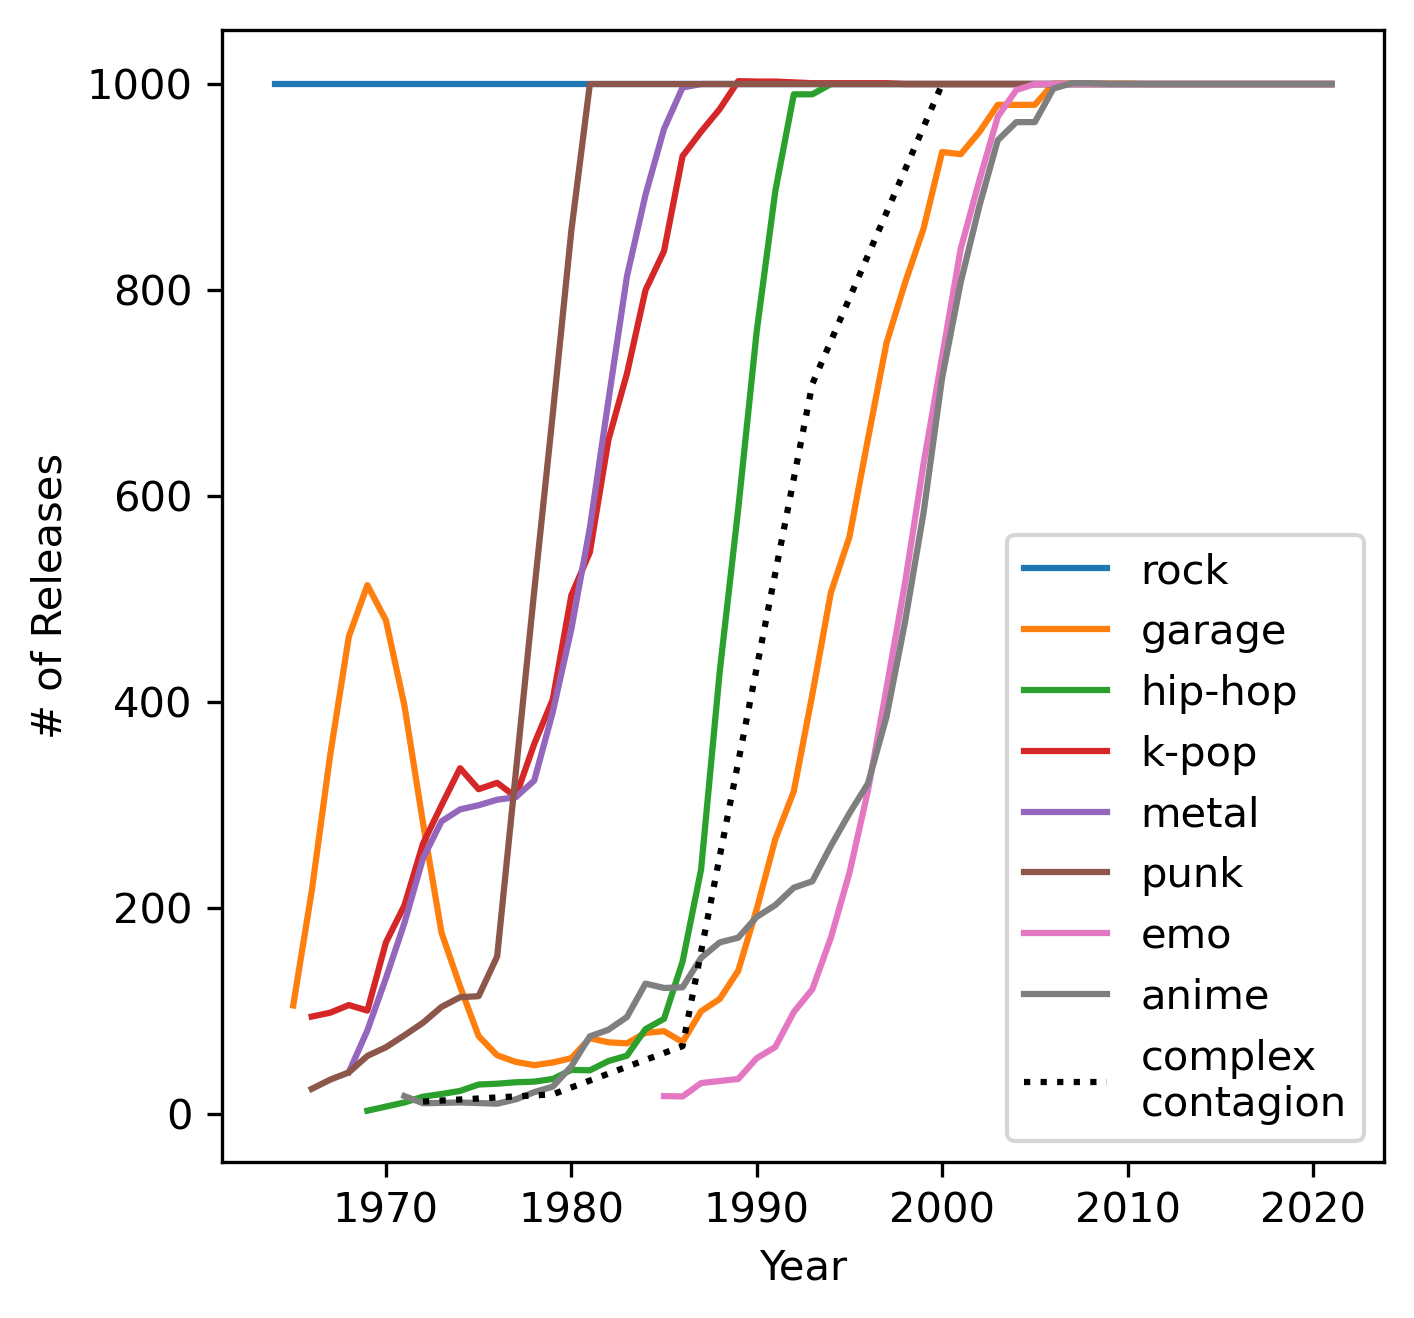

In [14]:
tracks_by_year = {}
plt.figure(figsize=(5,5))
for genre in genre_dict.keys():
    tracks_by_year[genre] = genre_dict[genre].groupby('year').count()['id']
    tracks_by_year[genre].rolling(5).mean().plot(label=genre)
plt.plot(complex_contagion['relative']+2000, complex_contagion['Infected'], label='complex\ncontagion', color='black',linestyle=':')
plt.legend()
plt.ylabel('# of Releases')
plt.xlabel('Year')
plt.savefig('releases.png',bbox_inches = "tight")

In [76]:
pd.DataFrame({'genre':first_maxed.keys(), 'year':first_maxed.values()}).sort_values('year')

,genre,year
0,rock,1964
5,punk,1981
4,metal,1987
3,k-pop,1989
2,hip-hop,1994
6,emo,2005
1,garage,2006
7,anime,2007


In [10]:
complex_contagion = music.full_simulate_net_diffusion()
complex_contagion['relative'] = complex_contagion['Execution'] - complex_contagion['Execution'][np.argmax(complex_contagion['Infected'])]
complex_contagion = complex_contagion.groupby('Execution')['Infected'].mean().reset_index()
complex_contagion['Infected'] = (complex_contagion['Infected']  / max(complex_contagion['Infected'])) * 1000

In [11]:
complex_contagion['relative'] = complex_contagion['Execution'] - complex_contagion['Execution'][np.argmax(complex_contagion['Infected'])]
complex_contagion['relative'] = complex_contagion['relative'] * 7
complex_contagion = complex_contagion[:np.argmax(complex_contagion['Infected'])+1]

Text(0, 0.5, 'releases')

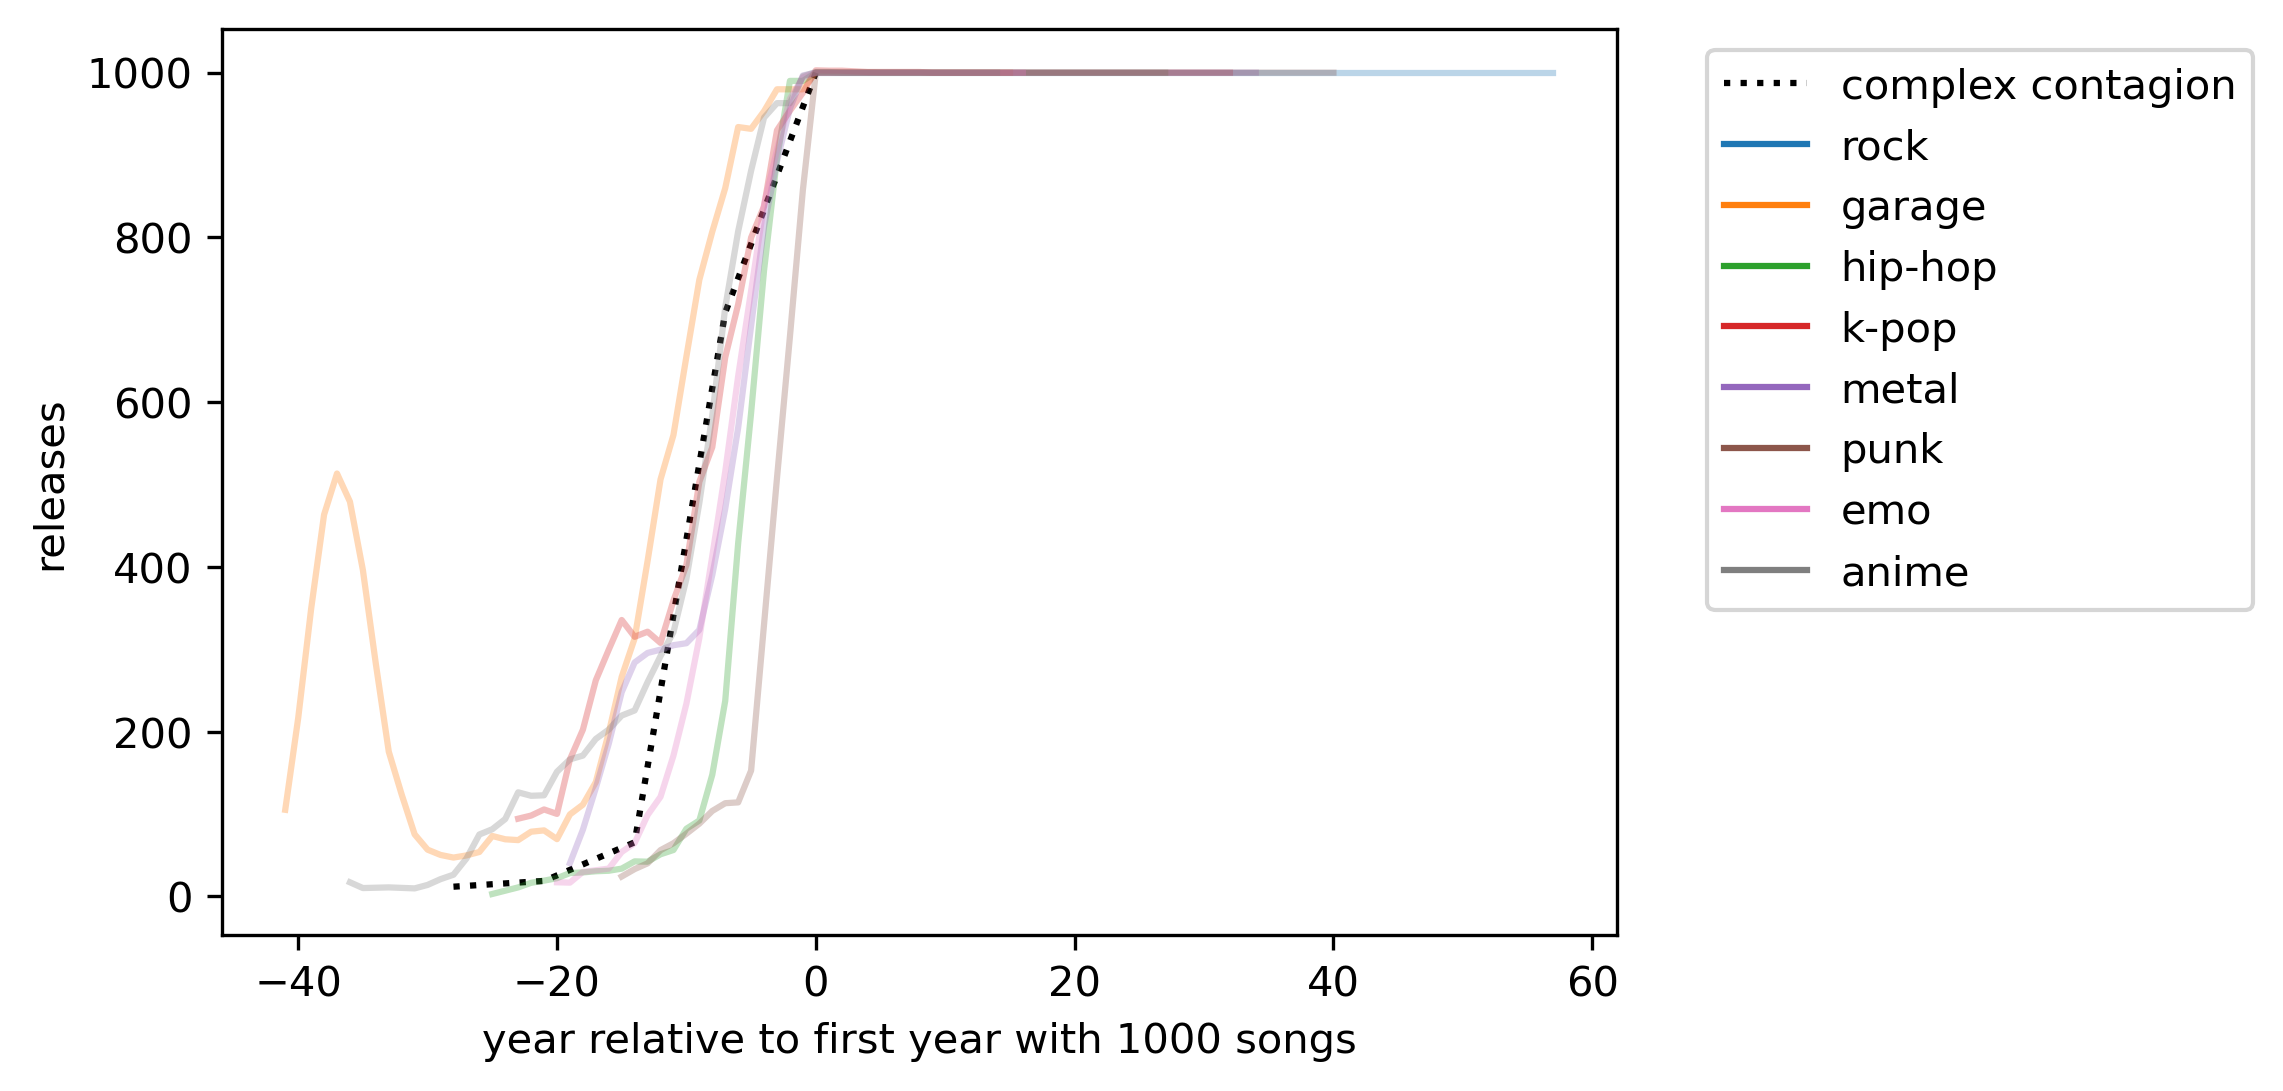

In [12]:
plt.plot(complex_contagion['relative'], complex_contagion['Infected'], label='complex contagion', color='black',linestyle=':')
for genre in hottopic_genres:
    plt.plot(by_count.loc[genre]['first_maxed'], by_count.loc[genre]['id'].rolling(5).mean(), label=genre, alpha=0.3)
# sns.lineplot(x='Execution', y='Infected', data=complex_contagion, label='Simulated Results', color='black')
leg = plt.legend(bbox_to_anchor=(1.05, 1))
for l in leg.legendHandles:
    l.set_alpha(1)
leg
plt.xlabel('year relative to first year with 1000 songs')
plt.ylabel('releases')

### by popularity

Spotify data also has a "popularity" metric. This would not be a good measure to see if the growth of genres follows the pattern of complex contagions, since older songs in a genre can become popular after the genre becomes popular. However, this score could be useful as a proxy for when subcultures have become commodified. According to [this article](https://lodgecove.com/what-is-the-spotify-popularity-index/), a popularity score of 20 is when Spotify suggests the song to people that aren't following the artist. If the average popularity score for a genre reaches 20, then that's a good sign that many of the songs released from that year could fit the taste of less counter- more mainstream- listeners.

In [18]:
by_popularity = pd.DataFrame(subculture_df.groupby(['genre','year'])['popularity'].mean())

In [19]:
# find when each genre first had a popularity score above 20
first_above_20 = {}
for genre in hottopic_genres:
    first_above_20[genre] = by_popularity.loc[genre][by_popularity.loc[genre].rolling(5).mean()['popularity'] > 21].index[0]
order = pd.DataFrame({'genre':first_above_20.keys(), 'year':first_above_20.values()}).sort_values('year').reset_index(drop=True)
hottopic_genres = list(order['genre'])
order

,genre,year
0,rock,1966
1,metal,1987
2,hip-hop,1995
3,punk,1996
4,k-pop,2010
5,emo,2012
6,garage,2014
7,anime,2014


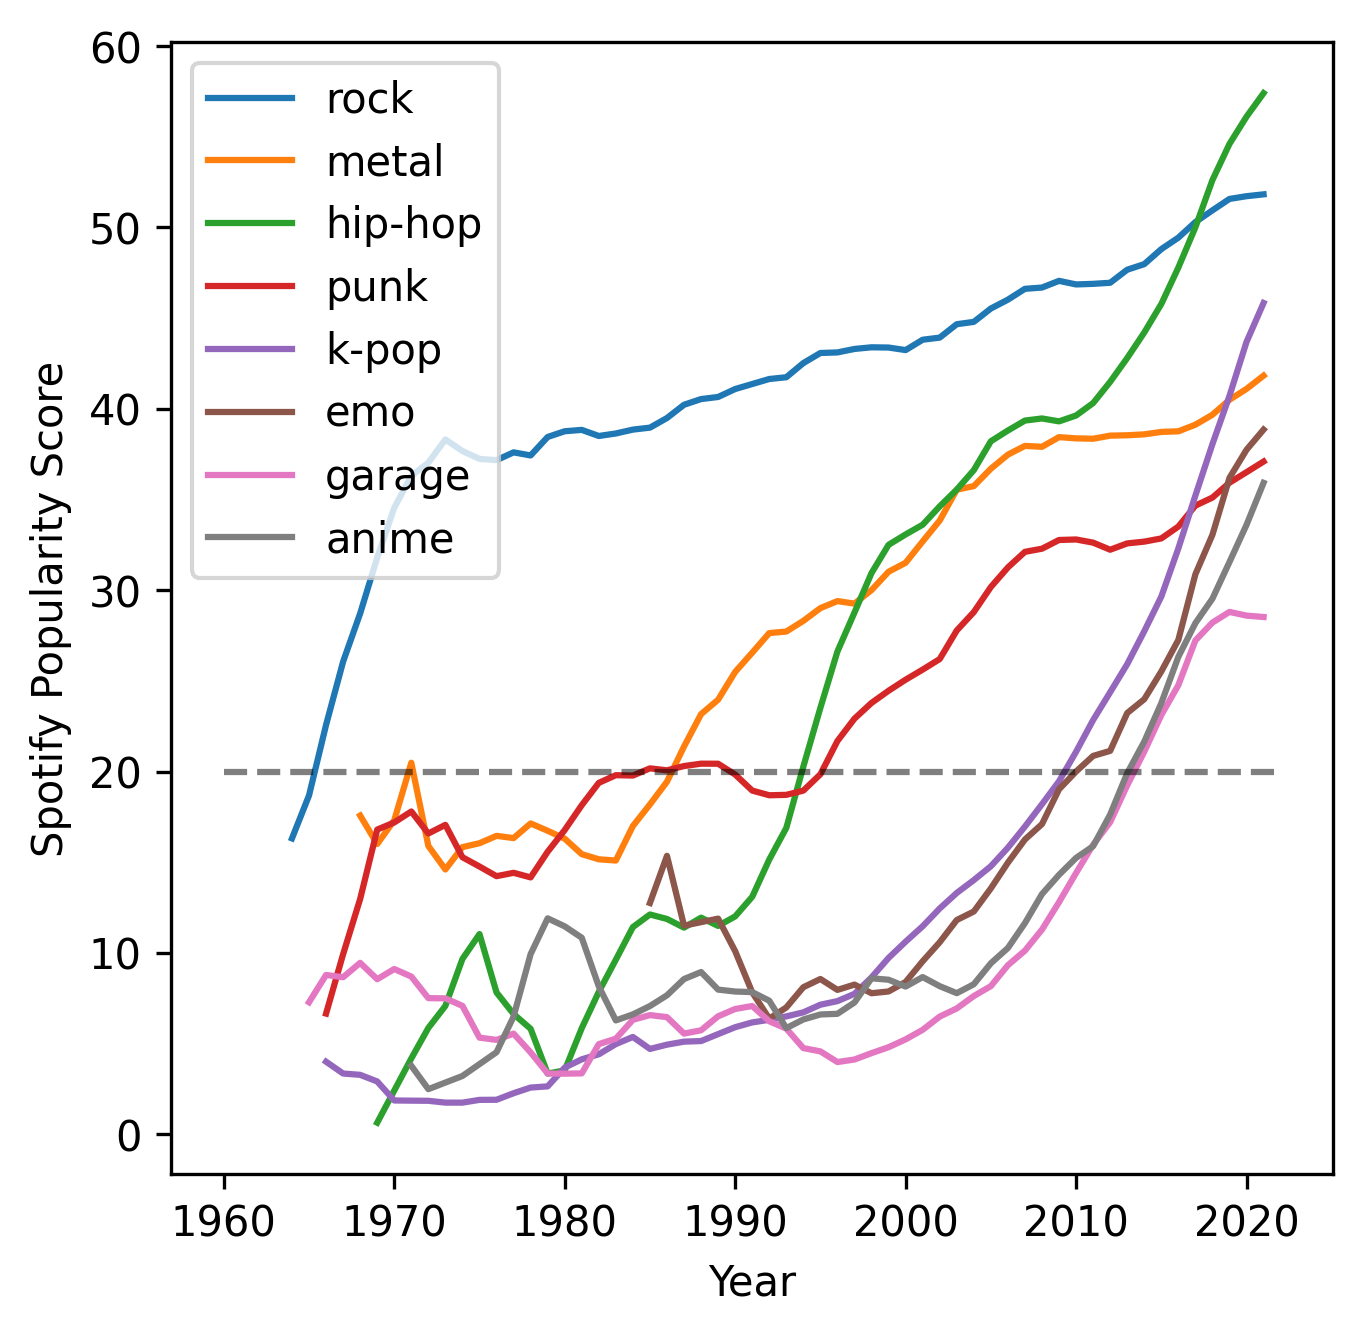

In [24]:
plt.figure(figsize=(5,5))
for genre in hottopic_genres:
    plt.plot(by_popularity.loc[genre].rolling(5).mean(), label=genre)
plt.plot([1960,2022],[20,20], linestyle='--', color='black',alpha=0.5)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Spotify Popularity Score')
plt.savefig('popularity.png')

### are subcultures influenced by each other?

In [19]:
min(standarized_dict['anime'].year)

1966

In [139]:
original_years = {}
# for i in order.index[:-1]:
for i in order.index:
    g = order['genre'][i]
    # original_years[g] = (min(standarized_dict[g].year),order['year'][i+1])
    # original_years[g] = (min(standarized_dict[g].year), min(standarized_dict[g].year) + 10)
    original_years[g] = (order.query('genre == @g')['year'].values[0]-10, order.query('genre == @g')['year'].values[0])
# for g in ['k-pop','emo','garage','anime']: # genres that become popular recently
#     original_years[g] = (min(standarized_dict[g].year),2022)
# original_years

In [140]:
pca_genres, pca_reconstruct = {}, {}
all_reconstruct_err = []
for genre in hottopic_genres:
    start,end = original_years[genre]
    df = standarized_dict[genre].query(f'year >= {start} & year <= {end}')
    pca = PCA(0.95)
    pca.fit(df[vars_audio])

    current_pca = pca.transform(standarized_df[vars_audio])
    current_reconstruct = pca.inverse_transform(current_pca)
    # current_explained = []
    # for v in current_reconstruct:
    #     resid = standarized_df[vars_audio] - v
    #     resid_norm = resid / np.linalg.norm(resid)
    #     explained = 1 - np.linalg.norm(resid_norm)
    #     current_explained.append(explained)
    # current_reconstruct_err = 1 - (standarized_df[vars_audio] - current_reconstruct) / np.linalg.norm(standarized_df[vars_audio] - current_reconstruct, axis=1)
    current_reconstruct_err = np.linalg.norm(standarized_df[vars_audio] - current_reconstruct, axis=1)
    # current_explained = [1 - current_reconstruct_resid/np.linalg.norm(current_reconstruct_resid, axis=1)]
    # standarized_df['explained_'+genre] = current_explained
    standarized_df['reconstruct_err_'+genre] = current_reconstruct_err

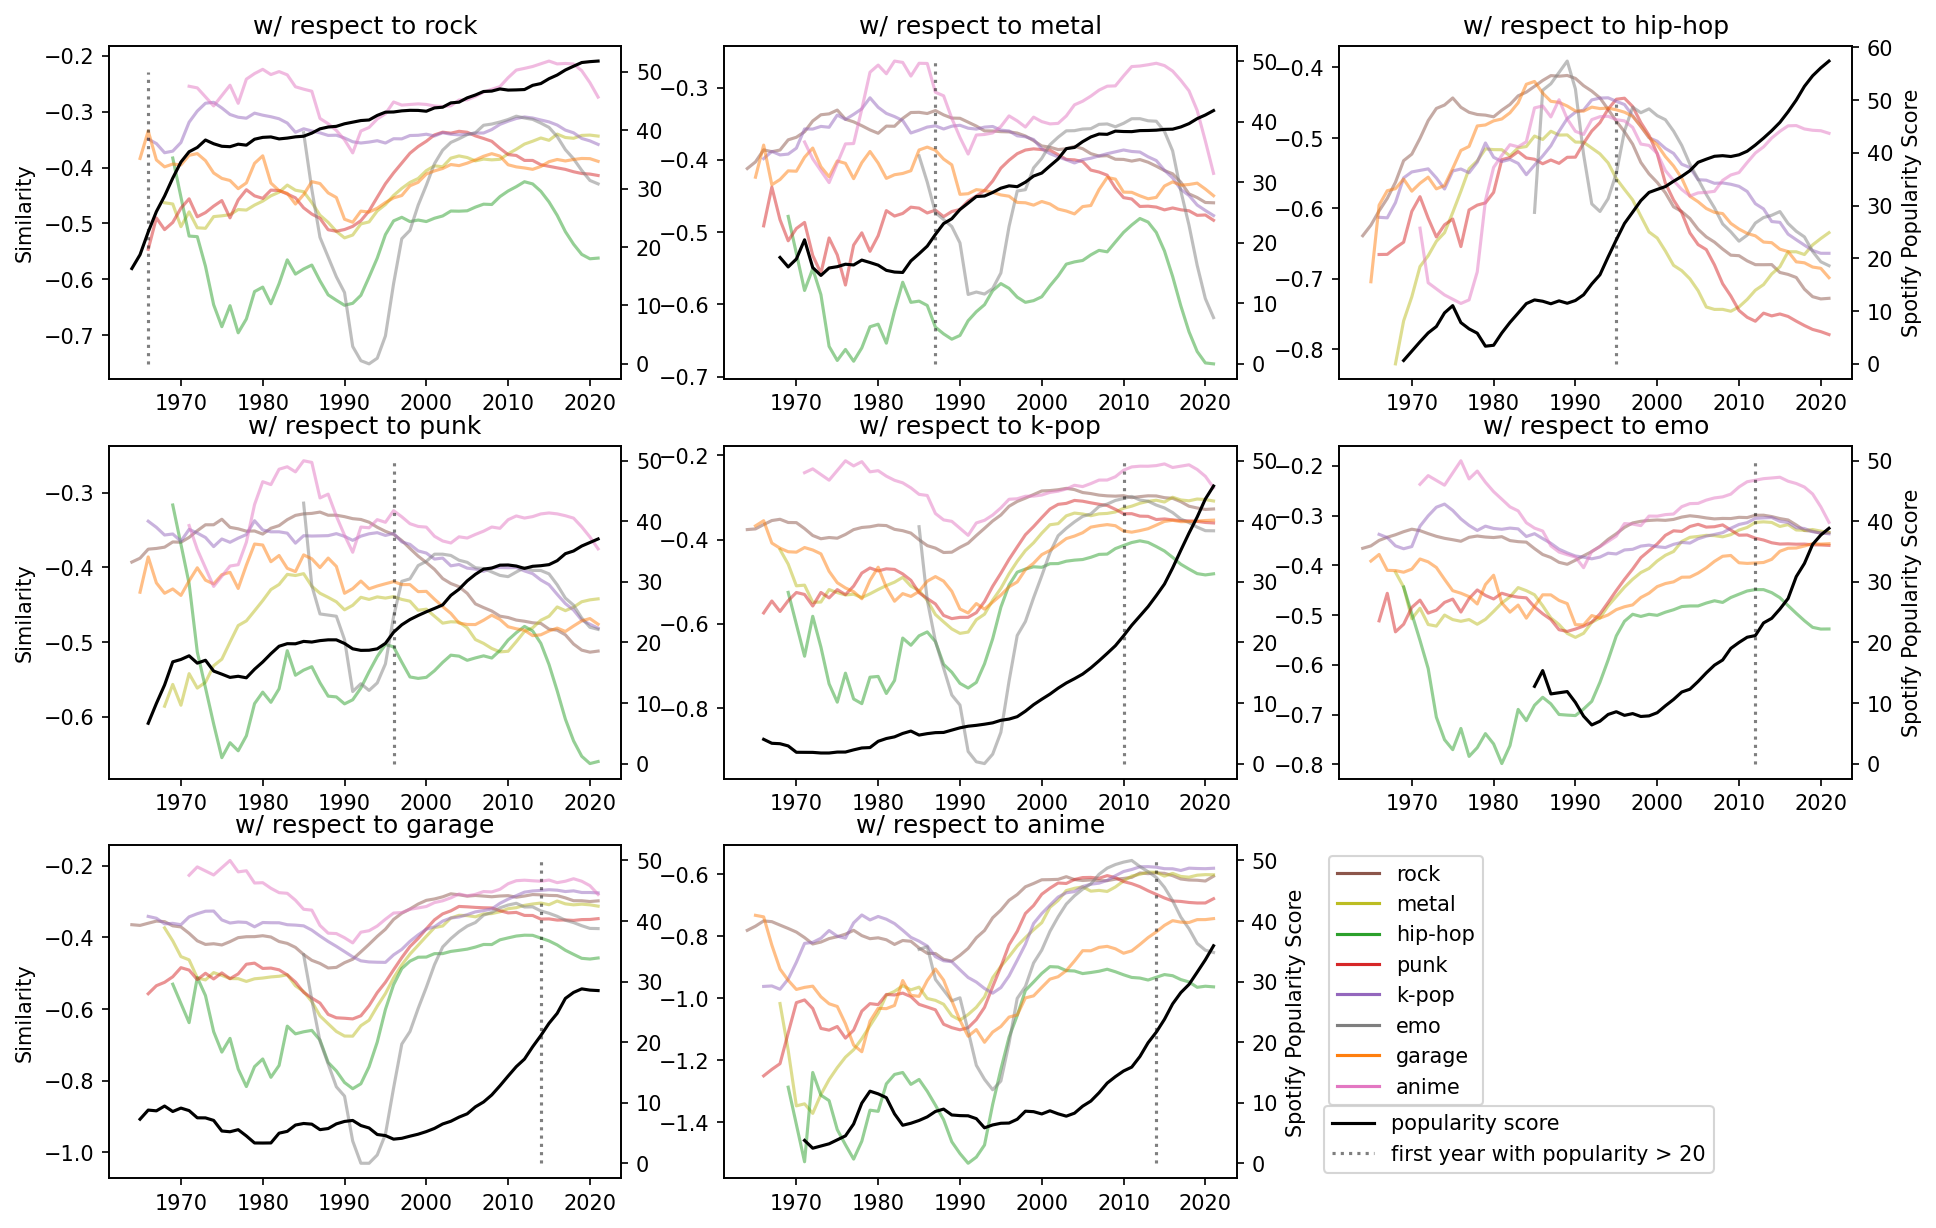

In [145]:
genre_colors = {'k-pop':'tab:purple','emo':'tab:gray','garage':'tab:orange','anime':'tab:pink','metal':'tab:olive','hip-hop':'tab:green','punk':'tab:red','rock':'tab:brown'}
plt.figure(figsize=(15,10))
for i,b in enumerate(hottopic_genres): # b is the influencer
    not_b = hottopic_genres.copy()
    not_b.remove(b)
    ax = plt.subplot(3,3,i+1)
    for a in not_b:
        # col = 'reconstruct_err_'+b
        df = standarized_df.query('genre == @a')[['year','reconstruct_err_'+b]].groupby('year').mean().rolling(5).mean()
        # df['ratio_explained'] = 1 - np.linalg.norm(df['reconstruct_err_'+b])
        # .groupby('year').mean().rolling(5).mean()
        # pct10 = np.percentile(df['reconstruct_err_'+b], 10)
        # df = df.query(f'reconstruct_err_{b} < 10')
        # np.percentile(compare['similarity_'+str(i)], 95)
        # if a == b:
        #     alpha = 1
        # else:
        #     alpha = 0.3
        ax.plot(df.index, -df.values, label=a,alpha=0.5,c=genre_colors[a])
        # ax.scatter(df['year'],df['ratio_explained'], label=a,alpha=0.5,c=genre_colors[a])
        if a == "anime":
            anime_label = ax.lines[-1]
    ax2 = ax.twinx()
    # ax2.vlines(first_above_20[b],min(-df.values),max(-df.values),linestyle=':',color='black',alpha=0.5, label='first year with popularity > 20')
    ax2.vlines(first_above_20[b],0,50,linestyle=':',color='black',alpha=0.5, label='first year with popularity > 20')
    ax2.plot(by_popularity.loc[b].rolling(5).mean(), c='black',label='popularity score')
    if i in {2,5,7}:
        ax2.set_ylabel('Spotify Popularity Score')
    if i in {0,3,6}:
        ax.set_ylabel('Similarity')
    plt.title("w/ respect to "+b)
leg = ax.legend(handles=ax.lines+[anime_label],bbox_to_anchor=(1.5, 1))

music.set_legend_alpha(leg.legendHandles)
ax2.legend(bbox_to_anchor=(1.95, 0.25))

# IV. Conclusion

Through the exploration of Spotify data, I found that the growth of subcultures follows the growth of a compelx contagion. Additionally, I found that all the subcultures that Hot Topic has commodified have followed the growth of a complex contagion. It makes sense that the growth of subcultures is similar to that of a complex contagion, since the commodification of a subculture leads to the aesthetics becoming trendy. The Spotify API only allows 1000 tracks to be pulled for each query, so the dataset's number of tracks produced within a genre per year was capped at 1000. However, we can still see the characteristic slow start, and extremely quick increase in slope.

However, I did not find strong evidence that the explosion of popularity of the latest subculture influences the previously commodified subcultures to shift towards it. This turned out to be a harder legisign to test than I expected, because there were a lot of questions I was unsure about: should I create a basis based on the formative years of the subculture? Maybe those years aren't the most representative, though, and the genre might still change before it becomes what it is recognized for. Should I then create a basis for when it became popular? By that point it might have already been commodified, and while I have the Spotify Popularity metric as a proxy for when it was commodified, I don't have accurate dates. Additionally, even after creating these basis and comparing how the other genres might have been affected, it's unclear whether the similarity increases because genre A is influenced by genre B, or if there were outside factors. For example, the music in anime realistically does not influence emo or hip-hop music. However, the graph shows that there is a point in time where the anime basis captures more of the variability in the emo and hip-hop music. The increase also does not coincide with the popularity of anime music, so the increase is likely due to another factor. However, with such a large change in average residual distance in a case we know it doesn't mean anything, then not much can be gleaned from the other graphs. A future analysis could find better dates for commodification, and another method to test this legisign.

After this entire exploration, I can conclude that while I'm unsure why the variation within genres has not decreased, I know that it hasn't. At a greater level, music in general follows trends that grow from the bottom up, in the manner of a complex contagion.

### code graveyard

In [ ]:
by_genre = {}
for genre in hottopic_genres:
    by_genre[genre] = standarized_dict[genre]
music.plot_numerical_std(vars_audio, hottopic_genres, by_genre, legend=True)